# Linear Regression

###### Rgression means to investigate the relationship between a dependent and independent variable
###### linear regression, showss the relationship btw 2 variables using a linear equation
###### linear regression is used for continuous variables to determine the value of a variable


In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20.0, 10.0]

In [56]:
df = pd.read_csv('headbrain.csv')
print(df.shape)
df.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [57]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [58]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [59]:
n = len(X)

In [60]:
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 *  mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


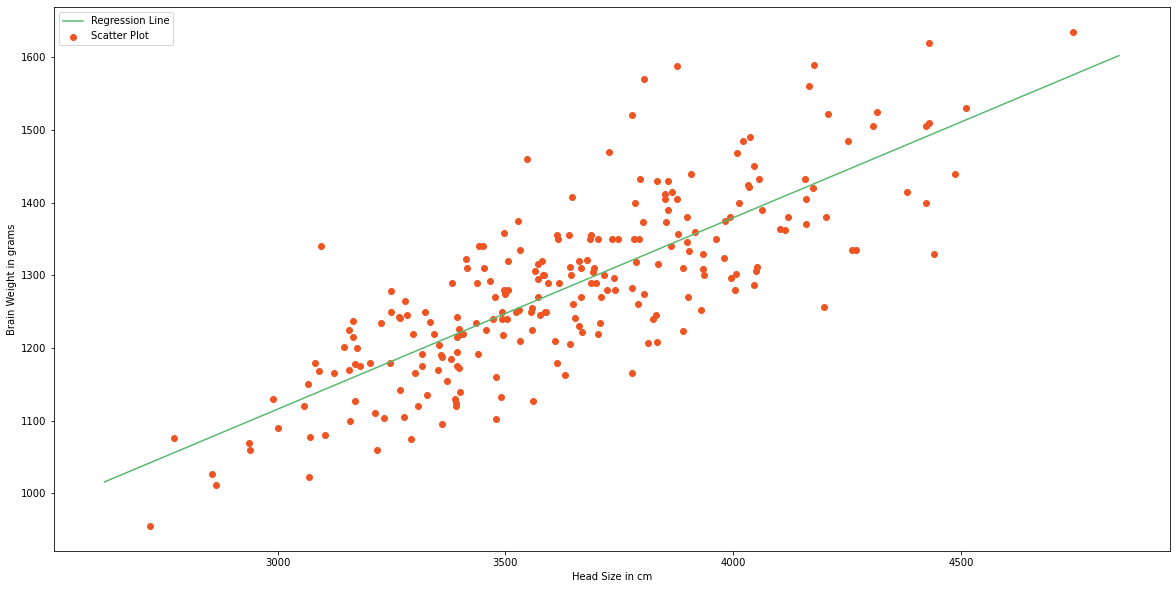

In [61]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
plt.plot(x, y, color = '#58b970', label = 'Regression Line')
plt.scatter(X, Y, c = '#ef5423', label = 'Scatter Plot')
plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [62]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)
print(r2)

0.6393117199570003


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)
r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957


# Logistic Regression

###### produces binary results ie, yes/no, T/F, high/low
##### y can only have values from 0 to 1
##### used for categorical variables
##### compares variables using a sigmoid curve

In [64]:
import seaborn as sns
import math
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
print("Number of passengers in original data:" + str(len(titanic_data.index))) 

Number of passengers in original data:891


## Analysing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

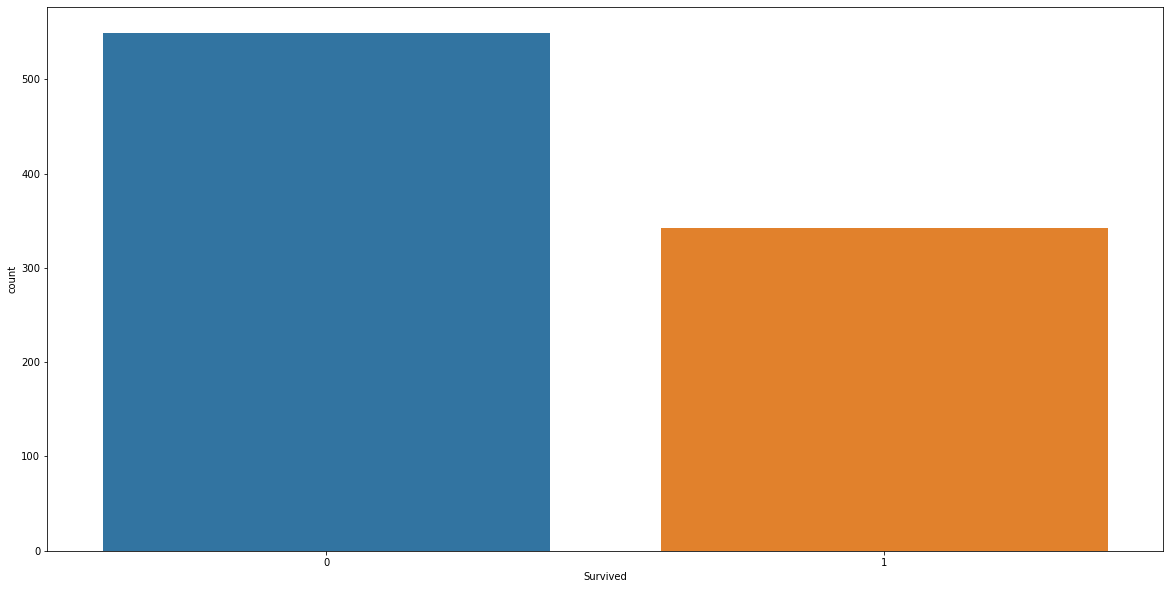

In [66]:
sns.countplot(x = 'Survived', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

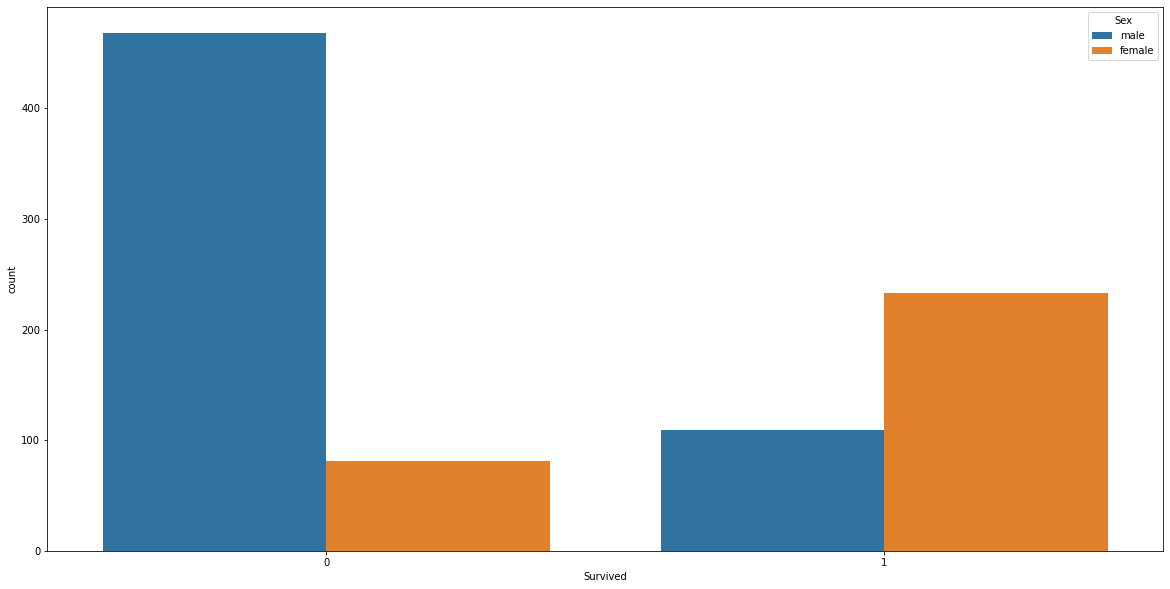

In [67]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

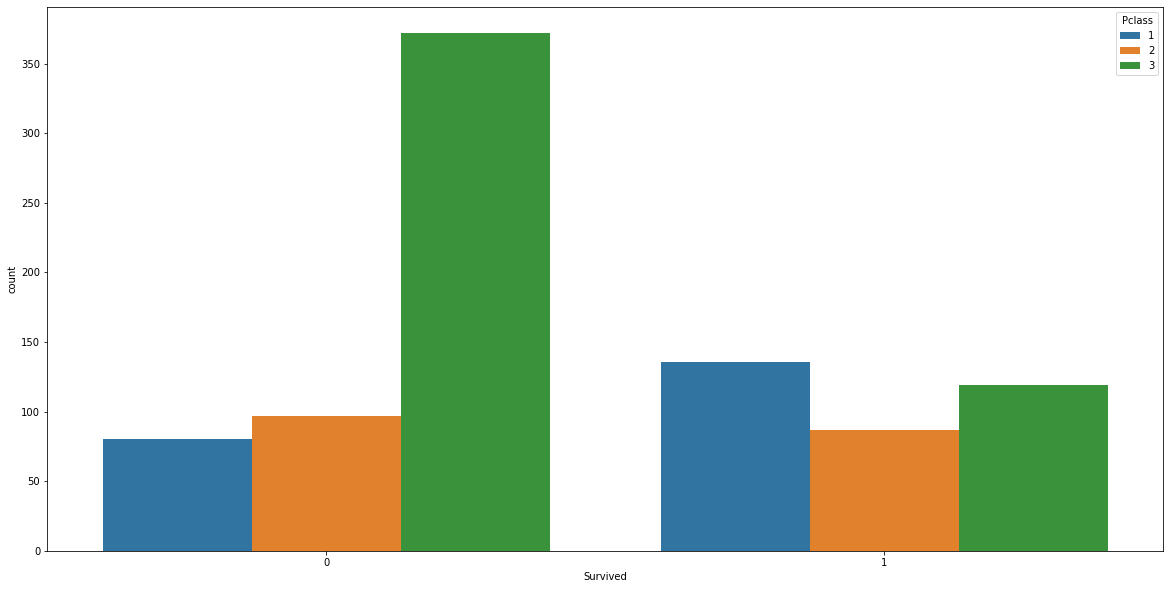

In [68]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

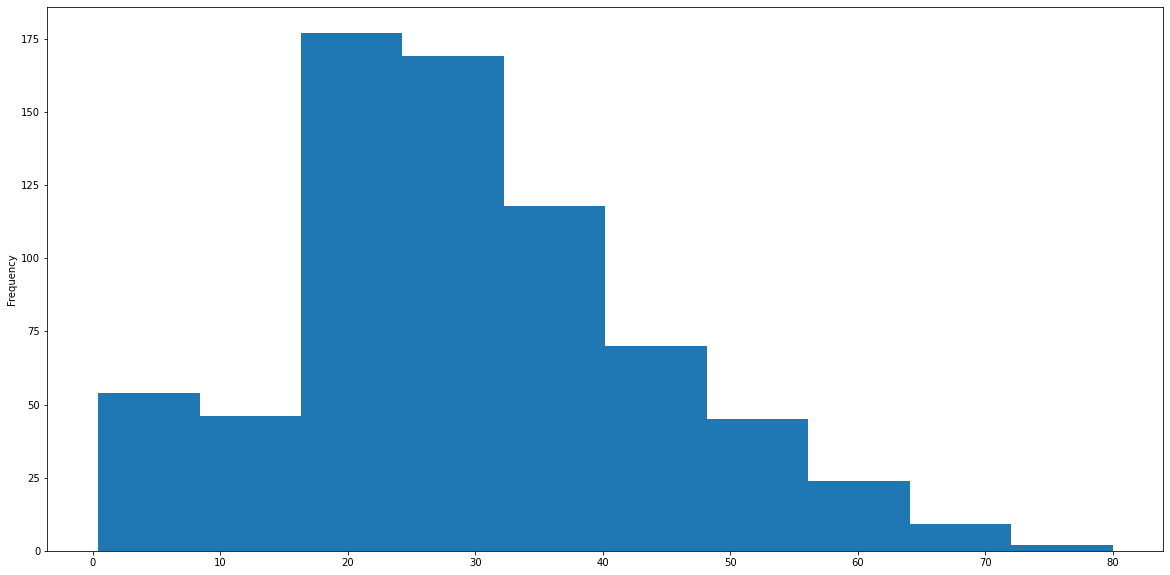

In [69]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

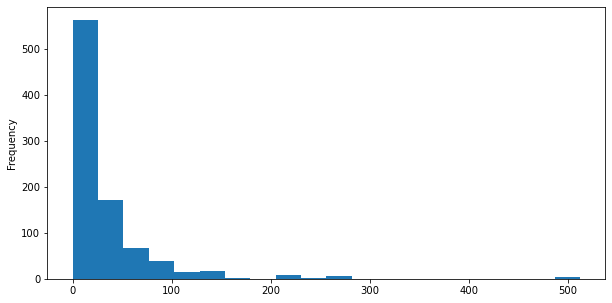

In [71]:
titanic_data['Fare'].plot.hist(bins = 20, figsize = (10, 5))

In [46]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

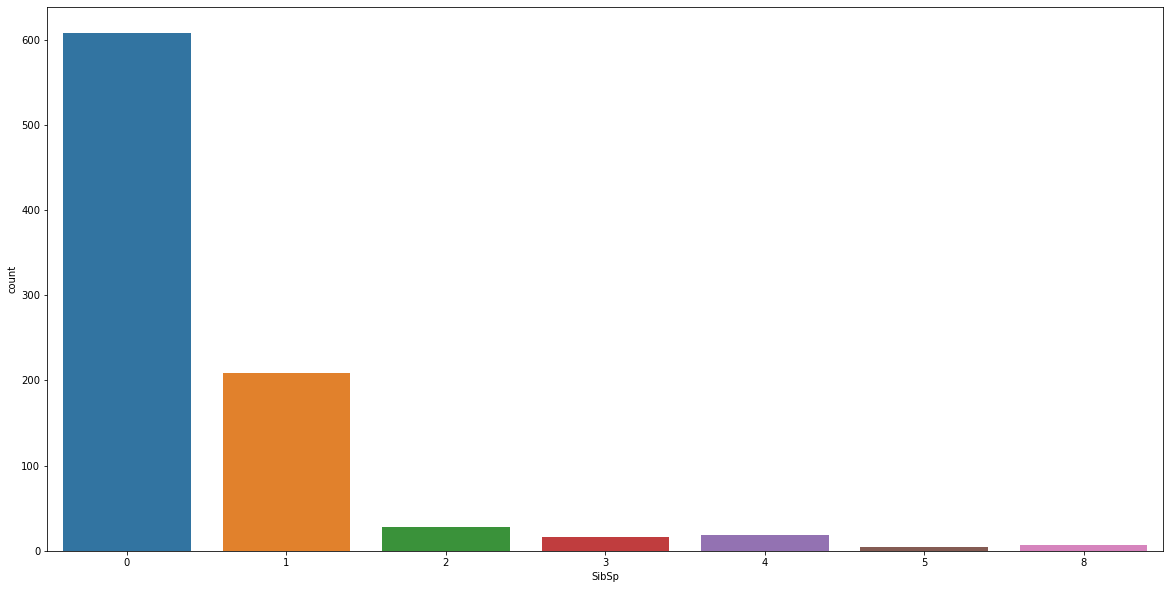

In [47]:
sns.countplot(x = 'SibSp', data = titanic_data)

## Data wrangling

In [48]:
titanic_data.isnull()
#true for null values, false for not null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

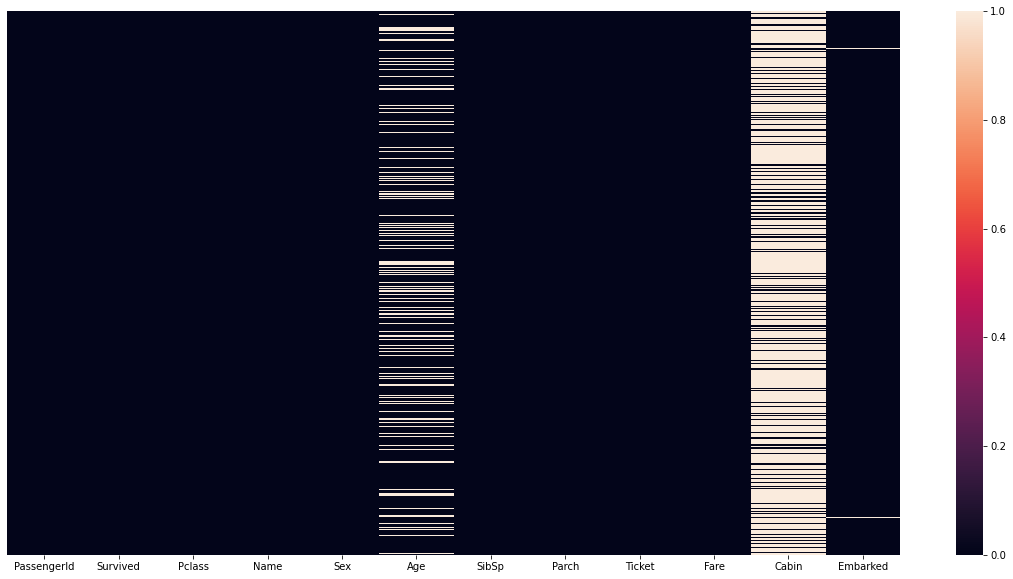

In [83]:
sns.heatmap(titanic_data.isnull(), yticklabels = False)

<AxesSubplot:>

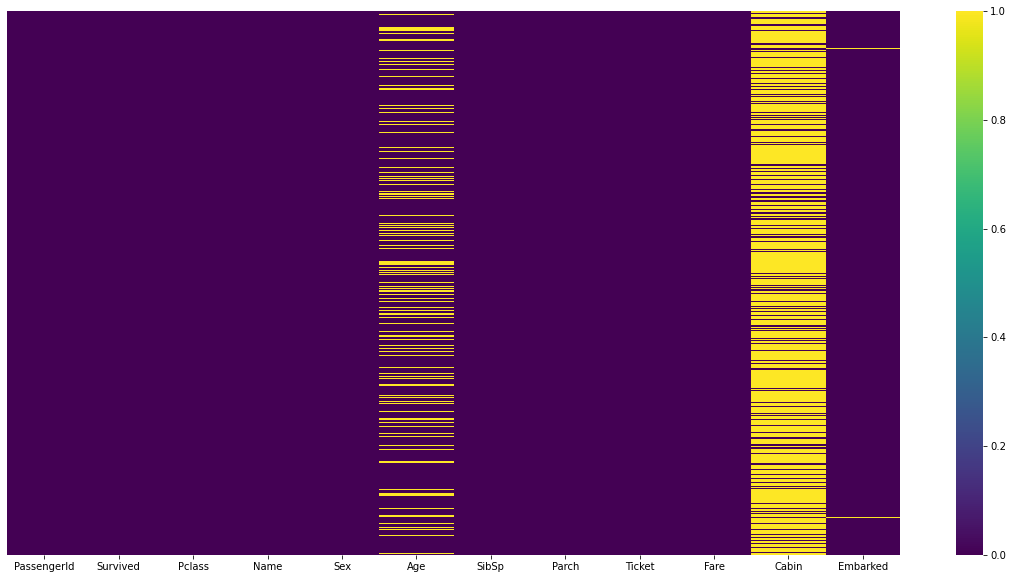

In [85]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap = 'viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

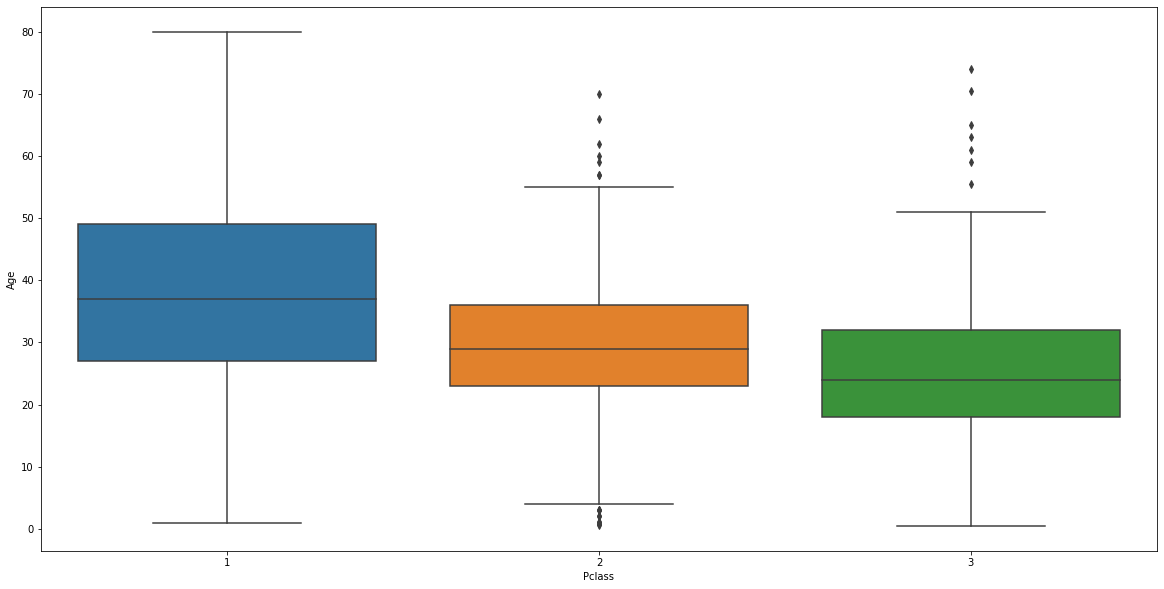

In [86]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data)

In [87]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data